In [1]:

import os

from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3


--2020-09-20 06:23:01--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.164.176, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  71.1MB/s    in 1.2s    

2020-09-20 06:23:02 (71.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [84]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150,150,3), include_top=False, weights='imagenet')

In [85]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [86]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [87]:
from tensorflow.keras.optimizers import RMSprop

In [88]:
# Flatten output to 1d 
x = layers.Flatten()(last_output)
# Adding fully connected layer
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

In [89]:
model.compile(optimizer=RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [90]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip


--2020-09-20 06:49:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.13.80, 172.217.8.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   127MB/s    in 0.5s    

2020-09-20 06:49:53 (127 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os 
import zipfile

In [92]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [93]:
from pathlib import Path

base_dir = Path('/tmp/cats_and_dogs_filtered/')

In [94]:
base_dir = Path('/tmp/cats_and_dogs_filtered')
train_dir = base_dir / Path('train')
validation_dir = base_dir / Path('validation')

In [95]:
# train_cats_dir = train_dir / Path('cats')
# train_dogs_dir = train_dir / Path('dogs')

# validation_cats_dir = validation_dir / Path('cats')
# validation_dogs_dir = validation_dir / Path('dogs')

In [96]:
train_datagen = ImageDataGenerator(rescale=1./255., 
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [97]:
validation_datagen = ImageDataGenerator(rescale=1./255.)

In [98]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary',
                                                   target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [99]:
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))

Found 1000 images belonging to 2 classes.


In [100]:
history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch=100, epochs=20, validation_steps=50, verbose=2)

Epoch 1/20
100/100 - 15s - loss: 0.3699 - accuracy: 0.8550 - val_loss: 0.1081 - val_accuracy: 0.9560
Epoch 2/20
100/100 - 14s - loss: 0.2186 - accuracy: 0.9110 - val_loss: 0.1533 - val_accuracy: 0.9430
Epoch 3/20
100/100 - 14s - loss: 0.1862 - accuracy: 0.9285 - val_loss: 0.1049 - val_accuracy: 0.9630
Epoch 4/20
100/100 - 14s - loss: 0.1879 - accuracy: 0.9285 - val_loss: 0.1143 - val_accuracy: 0.9620
Epoch 5/20
100/100 - 14s - loss: 0.2010 - accuracy: 0.9375 - val_loss: 0.1731 - val_accuracy: 0.9410
Epoch 6/20
100/100 - 14s - loss: 0.1968 - accuracy: 0.9420 - val_loss: 0.1105 - val_accuracy: 0.9660
Epoch 7/20
100/100 - 14s - loss: 0.1774 - accuracy: 0.9390 - val_loss: 0.1162 - val_accuracy: 0.9610
Epoch 8/20
100/100 - 14s - loss: 0.1726 - accuracy: 0.9390 - val_loss: 0.1306 - val_accuracy: 0.9610
Epoch 9/20
100/100 - 14s - loss: 0.1588 - accuracy: 0.9435 - val_loss: 0.1253 - val_accuracy: 0.9570
Epoch 10/20
100/100 - 14s - loss: 0.1553 - accuracy: 0.9435 - val_loss: 0.1730 - val_accura

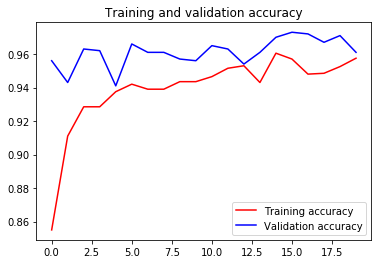

<Figure size 432x288 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

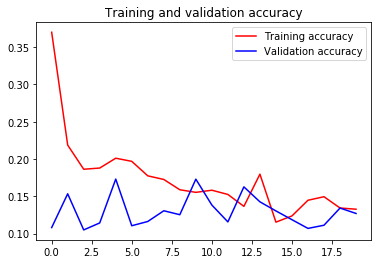

<Figure size 432x288 with 0 Axes>

In [103]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()